<a href="https://colab.research.google.com/github/donktark/Donktark.Python/blob/master/%EB%86%8D%EB%8B%B4%2C%EB%AA%85%EC%96%B8_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Î™ÖÏñ∏ vs ÎÜçÎã¥

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
!pip install transformers
!pip install optuna
!pip install datasets
!pip install torch
!pip install transformers[torch]
!pip install accelerate -U

In [27]:
#Í∏∞Î≥∏
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import requests
import seaborn as sns
import warnings

#Ï†ÑÏ≤òÎ¶¨
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from transformers import BertTokenizer

#Î™®Îç∏

import torch
import optuna
from torch.utils.data import TensorDataset
from datasets import Dataset
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score

In [28]:
#ÏãúÎìú Í≥†Ï†ï
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(88)


ÎÜçÎã¥ : https://icanhazdadjoke.com/api <p>
Î™ÖÏñ∏ : https://api.adviceslip.com/#object-search <p>
„ÄÄ„ÄÄ„ÄÄhttps://api.api-ninjas.com/v1/quotes?limit=10

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

### ÎÜçÎã¥ APIÎ•º Îç∞Ïù¥ÌÑ∞Î°ú Î∂àÎü¨Ïò§Í∏∞

In [29]:
joke_list = []
for page in list(range(38)) :
    api_url = f'https://icanhazdadjoke.com/search?page={page}'
    response = requests.get(api_url, headers = {'Accept': 'application/json'})
    joke_json = response.json()
    joke_list += ([i['joke'] for i in joke_json['results']])

In [30]:
joke_df = pd.DataFrame({'text' : joke_list, 'category' : ['joke' for _ in list(range(len(joke_list)))]})

In [31]:
joke_df

text category
0    I'm tired of following my dreams. I'm just goi...     joke
1    Did you hear about the guy whose whole left si...     joke
2    Why didn‚Äôt the skeleton cross the road? Becaus...     joke
3    What did one nut say as he chased another nut?...     joke
4     Where do fish keep their money? In the riverbank     joke
..                                                 ...      ...
755  Why are giraffes so slow to apologize? Because...     joke
756         "Dad, I'm hungry." Hello, Hungry. I'm Dad.     joke
757  I'm practicing for a bug-eating contest and I'...     joke
758  I have the heart of a lion... and a lifetime b...     joke
759  What do you call a guy lying on your doorstep?...     joke

[760 rows x 2 columns]

### Î™ÖÏñ∏ APIÎ•º Îç∞Ïù¥ÌÑ∞Î°ú Î∂àÎü¨Ïò§Í∏∞

In [32]:
quote_list = []

#Ìï¥Îãπ APIÎäî Îã§ÏàòÏùò Í∞íÏùÑ ÏöîÏ≤≠Ìï† Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Í≤ÄÏÉâ Í∏∞Îä•ÏóêÏÑú Î™®ÏùåÏùÑ ÌïòÎÇòÏî© ÎÑ£Í≥† Ìï©Ï≥êÏÑú Ï§ëÎ≥µ Î¨∏Íµ¨Î•º Ï†úÍ±∞ÌïòÎäî Í≤ÉÏúºÎ°ú Ìï®
#1Ï∞®ÏóêÏÑú advice slipÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÏúºÎÇò Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Î¨∏Ï†úÎ°ú api ninjaÏóêÏÑú Ï†úÍ≥µÌïòÎäî apiÎ°ú Î≥ÄÍ≤ΩÌïú ÌõÑ Îã§Ïãú ÌïôÏäµ.
for _ in list(range(70)) :
    api_url_q = 'https://api.api-ninjas.com/v1/quotes?limit=10'
    response_q = requests.get(api_url_q, headers = {'X-Api-Key': 'ÎπÑÎ∞Äüòù'})
    quote_json = response_q.json()
    quote_list += ([i['quote'] for i in quote_json])

In [33]:
quote_df = pd.DataFrame({'text' : quote_list, 'category' : ['advice' for _ in list(range(len(quote_list)))] }).drop_duplicates().reset_index(drop=True)

In [34]:
full_df = pd.concat((quote_df, joke_df))
full_df

text category
0    My friends and family are my support system. T...   advice
1    A little sincerity is a dangerous thing, and a...   advice
2    The thing that is really hard, and really amaz...   advice
3    As a rule, software systems do not work well u...   advice
4    Technology, like art, is a soaring exercise of...   advice
..                                                 ...      ...
755  Why are giraffes so slow to apologize? Because...     joke
756         "Dad, I'm hungry." Hello, Hungry. I'm Dad.     joke
757  I'm practicing for a bug-eating contest and I'...     joke
758  I have the heart of a lion... and a lifetime b...     joke
759  What do you call a guy lying on your doorstep?...     joke

[1457 rows x 2 columns]

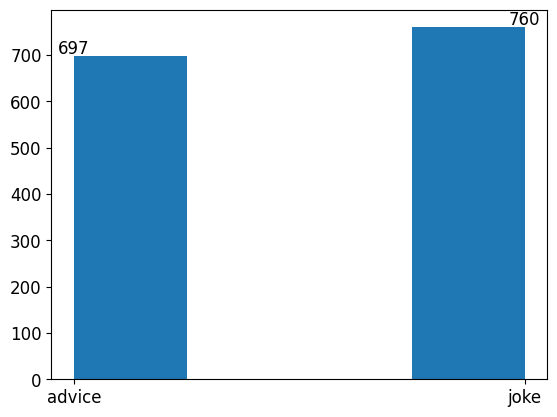

In [35]:
plt.hist(full_df['category'], bins=4, align='mid')
for i in ['advice', 'joke']:
    counts = len(full_df[full_df['category'] == i])
    plt.text(i, counts-3, str(counts), ha = 'center', va = 'bottom')
plt.rc('font', size = 12)
plt.show()

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

#### ÌäπÏàòÎ¨∏Ïûê Î∂àÏö©Ïñ¥ Ï†úÍ±∞, ÏÜåÎ¨∏Ïûê Î≥ÄÌôò

In [36]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s\d]', "", text)
    text = text.lower()
    text = text.split()
    text = [w for w in text if w not in stop_words]
    return " ".join(text)

full_df['text'] = full_df['text'].apply(lambda x: preprocess_text(x))
full_df

text category
0    friends family support system tell need hear w...   advice
1    little sincerity dangerous thing great deal ab...   advice
2    thing really hard really amazing giving perfec...   advice
3    rule software systems work well used failed re...   advice
4    technology like art soaring exercise human ima...   advice
..                                                 ...      ...
755  giraffes slow apologize takes long time swallo...     joke
756                  dad im hungry hello hungry im dad     joke
757  im practicing bugeating contest ive got butter...     joke
758              heart lion lifetime ban san diego zoo     joke
759                       call guy lying doorstep matt     joke

[1457 rows x 2 columns]

#### Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

In [38]:
df_train, df_test = train_test_split(full_df, test_size=0.3)

#### ÌÖçÏä§Ìä∏ ÌÜ†ÌÅ∞Ìôî, Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©

(array([224., 431., 140.,  87.,  57.,  43.,  22.,  10.,   3.,   2.]),
 array([ 2. ,  5.6,  9.2, 12.8, 16.4, 20. , 23.6, 27.2, 30.8, 34.4, 38. ]),
 <BarContainer object of 10 artists>)

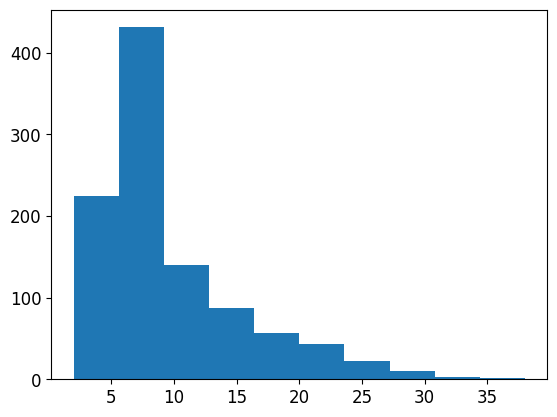

In [39]:
plt.hist([len(text.split()) for text in df_train['text']])

Ï£ºÎ°ú 15Í∞ú ÎÇ¥Ïô∏Ïùò Îã®Ïñ¥Î°ú Ïù¥Î£®Ïñ¥ÏßÑ Î¨∏Ïû•Ïù¥ ÎßéÏùÄ Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. <p>
Îç∞Ïù¥ÌÑ∞ Î≥ÄÍ≤Ω ÌõÑÏóêÎäî 20ÎåÄÎèÑ ÎßéÏúºÎØÄÎ°ú max_lengthÎ•º 20ÏúºÎ°ú Ï°∞Ï†ï.

In [40]:
# ÌÜ†ÌÅ∞Ìôî
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
def bt(text):
    return bert_tokenizer(text, padding= 'max_length', max_length=15, truncation=True)

train_bt = [bt(text) for text in df_train['text']]
test_bt = [bt(text) for text in df_test['text']]

# Î™©ÌëúÎ≥ÄÏàò Ïù∏ÏΩîÎî©
le = LabelEncoder()
le.fit(df_train['category'])
def making_labels(y):
    return pd.DataFrame({'labels' : list(le.transform(y))})


le_train = making_labels(df_train['category'])
le_test = making_labels(df_test['category'])

In [41]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'advice': 0, 'joke': 1}

#### Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Î≥ÄÌôò

In [42]:
ds_train = Dataset.from_pandas(pd.concat((pd.DataFrame(train_bt), le_train), axis=1), preserve_index=False)
ds_test = Dataset.from_pandas(pd.concat((pd.DataFrame(test_bt), le_test), axis=1), preserve_index=False)

In [43]:
print("ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ÏÖã : \n", ds_train)
print("\n Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ÏÖã : \n", ds_test)

ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ÏÖã : 
 Dataset({
    features: ['attention_mask', 'input_ids', 'token_type_ids', 'labels'],
    num_rows: 1019
})

 Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ÏÖã : 
 Dataset({
    features: ['attention_mask', 'input_ids', 'token_type_ids', 'labels'],
    num_rows: 438
})


# 3. Î™®Îç∏ÌïôÏäµ

In [44]:
# bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 2)

# #ÌèâÍ∞ÄÏßÄÌëú
# def compute_metrix(pred):
#     preds = pred.predictions.argmax(-1)
#     return {"accuracy": accuracy_score(pred.label_ids, preds)}

# #ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Î™©Î°ù
# def optuna_hp_space(trial):
#     return {
#         'learning_rate' : trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True),
#         "per_device_train_batch_size" : trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32, 64]),
#         "per_device_eval_batch_size" : trial.suggest_categorical("per_device_eval_batch_size", [8, 16, 32, 64])
#     }


# def model_trainer(trial):

#     #ÌäúÎãùÌï† ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞


#     #ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
#     training_args = TrainingArguments(
#     output_dir="./bert_model",
#     learning_rate=lr,
#     per_device_train_batch_size=pdtbs,
#     per_device_eval_batch_size=pdebs,

#     num_train_epochs=3,
#     evaluation_strategy="steps",
#     save_total_limit=2,
#     eval_steps=100,
#     load_best_model_at_end=True,
#     )

#     #Ìä∏Î†àÏù¥ÎÑà ÏÑ§Ï†ï
#     trainer = Trainer(
#         model = bert_model,
#         args = training_args,
#         train_dataset = ds_train,
#         eval_dataset = ds_test,
#         compute_metrics = compute_metrix
#     )

#     #Î™®Îç∏ ÌïôÏäµ
#     trainer.train()

#     #ÌèâÍ∞ÄÏßÄÌëú Ï†ÄÏû•
#     metrics = trainer.evaluate()
#     return metrics[['accuracy']] #Ìï¥ÏÑùÏù¥ Ïö©Ïù¥Ìïú accuracyÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌïôÏäµ

# model_study = optuna.create_study(direction='maximize') #Í∞íÏùÑ ÏµúÎåÄÌôîÌïòÎäî Î∞©Ìñ•ÏúºÎ°ú ÌäúÎãù (accuracyÎäî ÎÜíÏïÑÏïºÌïòÎØÄÎ°ú maximize)
# model_study.optimize(model_trainer, n_trials = 10)



# best_model = model_study.best_params
# best_score = model_study.best_value

# print("ÏµúÏ†Å Î™®Îç∏ : \n",best_model)
# print("\n ÏµúÏ†Å Ïä§ÏΩîÏñ¥ : \n", best_score)

ÏúÑ ÏΩîÎìúÏóêÏÑú Îã§ÏùåÍ≥º Í∞ôÏùÄ Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÎã§. <p>
TypeError: unhashable type: 'list'  <p>
[W 2023-10-17 12:22:36,283] Trial 0 failed with value None.  <p>
Ìï¥Í≤∞ÌïòÏßÑ Î™ª ÌñàÏúºÎÇò Îã§Î•∏ Î∞©Î≤ïÏù¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê ÌïòÎã®Ïùò Îã§Î•∏ ÏΩîÎìúÎ•º ÏÇ¨Ïö©Ìï¥ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ Ïã§ÏãúÌïúÎã§.

In [52]:
# bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 2)

def model_init(trial):
    return BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 2)


#ÌèâÍ∞ÄÏßÄÌëú
def compute_metrix(pred):
    preds = pred.predictions.argmax(-1)
    labels = pred.label_ids
    class_weights = [1.0, 1.25] # 0: advice, 1: joke
    weight_acc = accuracy_score(labels, preds, sample_weight = [class_weights[label] for label in labels])
    return {"accuracy": weight_acc}

#ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Î™©Î°ù
def optuna_hp_space(trial):
    return {
        'learning_rate' : trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True),
        "per_device_train_batch_size" : trial.suggest_categorical("per_device_train_batch_size", [4, 8, 16, 32, 64]),
        "per_device_eval_batch_size" : trial.suggest_categorical("per_device_eval_batch_size", [4, 8, 16, 32, 64])
    }


#ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÏûÖÎ†•
training_args = TrainingArguments(
    output_dir="./bert_model",
    # learning_rate=learning_rate,
    # per_device_train_batch_size=per_device_train_batch_size,
    # per_device_eval_batch_size=per_device_eval_batch_size,

    num_train_epochs=12,
    evaluation_strategy="steps",
    save_total_limit=2,
    eval_steps=50,
    load_best_model_at_end=True, #Îç∞Ïù¥ÌÑ∞ Î≥ÄÍ≤Ω ÌõÑ Î≥ÄÍ≤ΩÌï®. ÌõÑÏóê Îã§Ïãú Ìï†ÎïåÎäî TrueÎ°ú Î∞îÍøÄÍ≤É
)

#Ìä∏Î†àÏù¥ÎÑà ÏÑ§Ï†ï
trainer = Trainer(
    model = None,
    model_init = model_init,
    args = training_args,
    train_dataset = ds_train,
    eval_dataset = ds_test,
    compute_metrics = compute_metrix
)

best_trial = trainer.hyperparameter_search(
    direction = "maximize",
    backend = 'optuna',
    hp_space = optuna_hp_space,
    n_trials = 20,
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2023-10-21 12:32:03,679] A new study created in memory with name: no-name-962588eb-7c5d-41a9-9765-d1bb0ec6e5ab
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:33:37,735] Trial 0 finished with value: 0.4287158746208291 and parameters: {'learning_rate': 0.0055540210835167405, 'per_device_train_batch_size': 16, 'per_device_eval_batch_size': 32}. Best is trial 0 with value: 0.4287158746208291.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:39:20,250] Trial 1 finished with value: 0.5712841253791708 and parameters: {'learning_rate': 0.0001848144809533997, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16}. Best is trial 1 with value: 0.5712841253791708.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:40:12,914] Trial 2 finished with value: 0.5712841253791708 and parameters: {'learning_rate': 0.005379191927575034, 'per_device_train_batch_size': 32, 'per_device_eval_batch_size': 16}. Best is trial 1 with value: 0.5712841253791708.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:41:57,779] Trial 3 finished with value: 0.4287158746208291 and parameters: {'learning_rate': 0.0011678113846351143, 'per_device_train_batch_size': 16, 'per_device_eval_batch_size': 4}. Best is trial 1 with value: 0.5712841253791708.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:48:38,567] Trial 4 finished with value: 0.5712841253791708 and parameters: {'learning_rate': 0.00011749586618500617, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 4}. Best is trial 1 with value: 0.5712841253791708.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:49:40,017] Trial 5 finished with value: 0.5712841253791708 and parameters: {'learning_rate': 0.0064469018346047045, 'per_device_train_batch_size': 32, 'per_device_eval_batch_size': 4}. Best is trial 1 with value: 0.5712841253791708.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:49:46,396] Trial 6 pruned. 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:50:00,639] Trial 7 pruned. 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:50:44,908] Trial 8 finished with value: 0.5712841253791708 and parameters: {'learning_rate': 0.001521782660239175, 'per_device_train_batch_size': 64, 'per_device_eval_batch_size': 8}. Best is trial 1 with value: 0.5712841253791708.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:51:37,307] Trial 9 finished with value: 0.9216380182002022 and parameters: {'learning_rate': 4.293031986019314e-05, 'per_device_train_batch_size': 32, 'per_device_eval_batch_size': 32}. Best is trial 9 with value: 0.9216380182002022.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:52:29,591] Trial 10 finished with value: 0.9277047522750252 and parameters: {'learning_rate': 2.006496920169984e-05, 'per_device_train_batch_size': 32, 'per_device_eval_batch_size': 32}. Best is trial 10 with value: 0.9277047522750252.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:53:21,534] Trial 11 finished with value: 0.9125379170879676 and parameters: {'learning_rate': 1.747106344473912e-05, 'per_device_train_batch_size': 32, 'per_device_eval_batch_size': 32}. Best is trial 10 with value: 0.9277047522750252.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:54:13,447] Trial 12 finished with value: 0.9125379170879676 and parameters: {'learning_rate': 1.2816322922646813e-05, 'per_device_train_batch_size': 32, 'per_device_eval_batch_size': 32}. Best is trial 10 with value: 0.9277047522750252.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:55:06,338] Trial 13 finished with value: 0.916076845298281 and parameters: {'learning_rate': 4.085198549140344e-05, 'per_device_train_batch_size': 32, 'per_device_eval_batch_size': 32}. Best is trial 10 with value: 0.9277047522750252.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 12:57:50,608] Trial 14 finished with value: 0.9241658240647118 and parameters: {'learning_rate': 4.7342389637695096e-05, 'per_device_train_batch_size': 8, 'per_device_eval_batch_size': 32}. Best is trial 10 with value: 0.9277047522750252.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 13:00:38,208] Trial 15 finished with value: 0.9312436804853387 and parameters: {'learning_rate': 4.644981822789779e-05, 'per_device_train_batch_size': 8, 'per_device_eval_batch_size': 64}. Best is trial 15 with value: 0.9312436804853387.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 13:00:43,982] Trial 16 pruned. 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 13:00:50,041] Trial 17 pruned. 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 13:03:39,481] Trial 18 finished with value: 0.9398382204246714 and parameters: {'learning_rate': 7.361580217705999e-05, 'per_device_train_batch_size': 8, 'per_device_eval_batch_size': 64}. Best is trial 18 with value: 0.9398382204246714.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2023-10-21 13:03:45,748] Trial 19 pruned. 


In [53]:
best_trial

BestRun(run_id='18', objective=0.9398382204246714, hyperparameters={'learning_rate': 7.361580217705999e-05, 'per_device_train_batch_size': 8, 'per_device_eval_batch_size': 64}, run_summary=None)

1Ï∞® : Ï†ïÌôïÎèÑÍ∞Ä ÏïΩ 0.929Î°ú ÎÜíÍ≤å ÎÇòÌÉÄÎÇ¨Îã§. Ïù¥ Î™®Îç∏ÏùÑ Ïù¥Ïö©Ìï¥ Îã§Î•∏ ÎÜçÎã¥Í≥º Î™ÖÏñ∏Ïù¥ Ï£ºÏñ¥Ï°åÏùÑ Îïå Ïñ¥ÎñªÍ≤å Î∂ÑÎ•òÌï† ÏßÄ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

# 4. ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°

In [54]:
best_hp = best_trial.hyperparameters
best_model = model_init(best_hp)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ÏÉàÎ°úÏö¥ apiÏóêÏÑú Ïú†ÏÇ¨Ìïú Îç∞Ïù¥ÌÑ∞Î•º Î∞õÏïÑ ÎèôÏùºÌïú Ï†ÑÏ≤òÎ¶¨Î•º Ìïú ÌõÑ Î™®Îç∏Ïóê Ï†ÅÏö©ÏãúÌÇ®Îã§.

In [55]:
#ÎÜçÎã¥
new_api_url_j = 'https://official-joke-api.appspot.com/random_ten'
new_response_j = requests.get(new_api_url_j)
new_joke_json = new_response_j.json()
joke_new = [i['setup'] + " " + i['punchline'] for i in new_joke_json]
joke_new_df = pd.DataFrame({'text' : joke_new, 'category' : ['joke' for _ in list(range(len(joke_new)))]})

#Î™ÖÏñ∏
num = random.randint(1,38)
new_api_url_q = 'https://quote-garden.onrender.com/api/v3/quotes/?page=' + f'{num}'
new_response_q = requests.get(new_api_url_q)
new_quote_json = new_response_q.json()
quote_new = [i['quoteText'] for i in new_quote_json['data']]
quote_new_df = pd.DataFrame({'text' : quote_new, 'category' : ['advice' for _ in list(range(len(quote_new)))]})

new_df = pd.concat((joke_new_df, quote_new_df), axis = 0)

new_df['text'] = new_df['text'].apply(lambda x: preprocess_text(x))

new_bt = [bt(text) for text in new_df['text']]
new_le = making_labels(new_df['category'])

ds_new = Dataset.from_pandas(pd.concat((pd.DataFrame(new_bt), new_le), axis = 1), preserve_index=False)

In [56]:
new_pred = Trainer(model = best_model).predict(ds_new)

In [57]:
new_logits = torch.tensor(new_pred.predictions)
new_preds = new_logits.argmax(-1)

In [58]:
print('ÏòàÏ∏° : ', new_preds)
print('ÏòàÏ∏° Ï†ïÌôïÎèÑ : ', accuracy_score(new_preds, ds_new['labels']))

ÏòàÏ∏° :  tensor([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
ÏòàÏ∏° Ï†ïÌôïÎèÑ :  0.65


1Ï∞® : tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) <p>
Ï£ºÎ°ú jokeÎ°ú ÎßéÏù¥ ÏòàÏ∏°ÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. Ïù¥Îäî ÌïôÏäµÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä jokeÍ∞Ä Îçî ÎßéÏùÄ Î∂àÍ∑†ÌòïÏù¥ ÏûàÏñ¥ adviceÏóê Í∑∏ÎßåÌÅº Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨Ìï† ÌïÑÏöîÍ∞Ä ÏûàÎã§Í≥† ÌåêÎã®ÎêòÏóàÎã§.

2Ï∞® : tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) <p>
Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä ÌõÑÏóêÎäî Ïò§ÌûàÎ†§ Î™®Îëê adviceÎ°ú Î∂ÑÎ•òÌïòÍ≥† ÏûàÎã§.